# Proyecto de Machine Learning - Clasificación de Vinos

## Introducción

El Machine Learning (ML) es una rama de la inteligencia artificial que permite a los sistemas aprender patrones a partir de datos y realizar predicciones sin ser programados explícitamente para cada tarea.

Existen tres grandes tipos de aprendizaje automático:
- Supervisado
- No supervisado
- Aprendizaje por refuerzo

En este proyecto trabajaremos con **aprendizaje supervisado**, ya que contamos con una variable objetivo conocida.

## Definición del problema

El objetivo es clasificar vinos en tres categorías distintas en función de sus características químicas.

Tipo de problema:
- Aprendizaje supervisado
- Clasificación
- Clasificación multiclase (3 clases)

Variable objetivo (y): `class`  
Variables predictoras (X): características químicas del vino.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Cambia la ruta si hace falta
df_wines = pd.read_csv("../data/wine.data", header=None)
df_wines.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/wine.data'

In [ ]:
#Asignamos nombres a las columnas

columns = [
    "class",
    "alcohol",
    "malic_acid",
    "ash",
    "alcalinity_of_ash",
    "magnesium",
    "total_phenols",
    "flavanoids",
    "nonflavanoid_phenols",
    "proanthocyanins",
    "color_intensity",
    "hue",
    "od280_od315",
    "proline"
]

df_wines.columns = columns

df_wines.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Convertimos clases 1,2,3 en 0,1,2
df_wines["class"] = df_wines["class"] - 1

# Comprobamos
df_wines["class"].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
X = df_wines.drop("class", axis=1)
y = df_wines["class"]

In [ ]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280_od315           178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df_wines.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


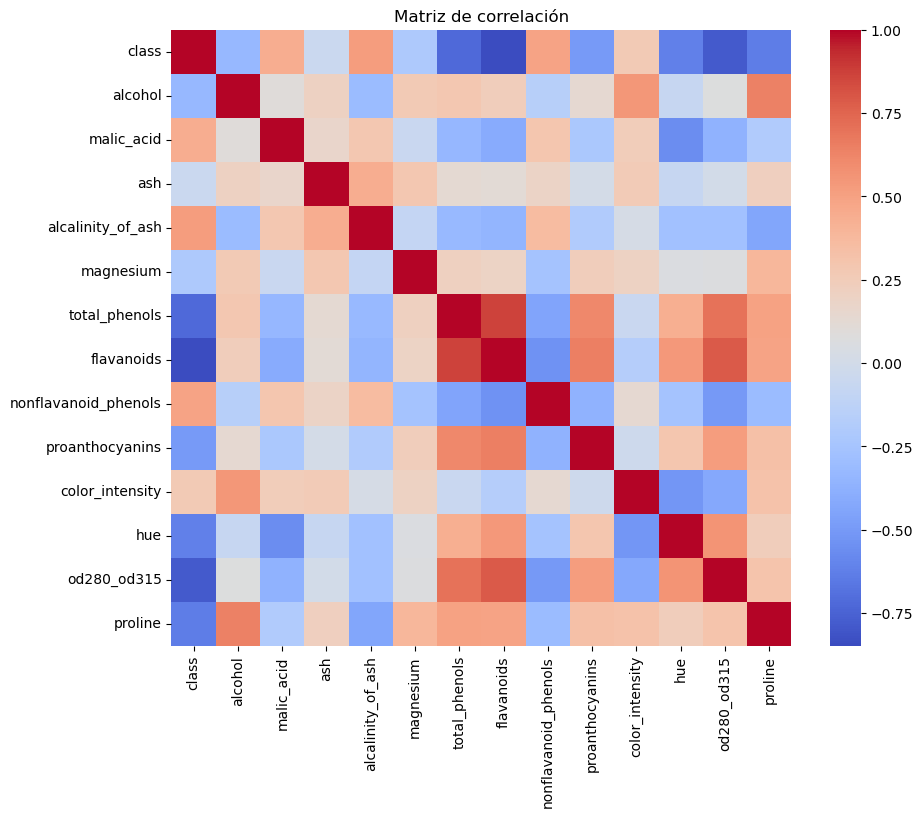

In [ ]:


plt.figure(figsize=(10,8))
sns.heatmap(df_wines.corr(), cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [ ]:
#Dividimos el dataset en entrenamiento (80%) y test (20%), utilizando stratify=y para mantener la proporción de clases en ambos subconjuntos. Esto evita sesgos derivados de un desbalance en la variable objetivo.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

In [ ]:
#Aplicamos StandardScaler únicamente sobre los datos de entrenamiento y luego transformamos el conjunto de test. Esto es fundamental en modelos basados en distancia como KNN, ya que las variables deben estar en la misma escala.
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Entrenamos un modelo KNN con 5 vecinos como punto de partida. Este modelo clasifica cada observación en función de las clases más cercanas en el espacio de características.
knn_wines = KNeighborsClassifier(n_neighbors=5)

knn_wines.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
#Predicciones de Y
y_pred = knn_wines.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222

Matriz de confusión:
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



"El modelo KNN logra una accuracy del 97%, con muy baja confusión entre clases. Solo se observa un error puntual entre la clase 1 y 2, lo que indica que las características químicas permiten una clara separación entre tipos de vino."

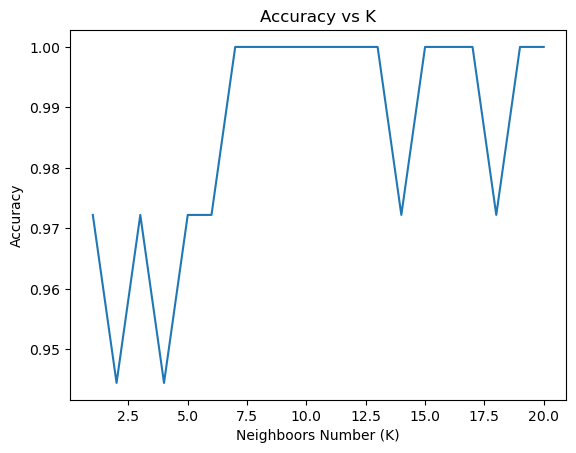

In [ ]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies)
plt.xlabel("Neighboors Number (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

In [ ]:
#Analizamos el impacto del hiperparámetro K en el rendimiento del modelo. Observamos que el accuracy se estabiliza a partir de K≈7, alcanzando incluso el 100% en el conjunto de test. Esto indica que el dataset presenta una estructura claramente separable.

In [ ]:
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Mejor K encontrado: {best_k}")
print(f"Accuracy correspondiente: {best_accuracy:.4f}")

Mejor K encontrado: 7
Accuracy correspondiente: 1.0000


In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=7)
knn_final.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Al evaluar distintos valores de K entre 1 y 20, observamos que el rendimiento se estabiliza a partir de K≈7, alcanzando una accuracy del 100% en el conjunto de test. Esto sugiere que el dataset presenta una separación muy clara entre clases.
Dado que el dataset es pequeño y bien estructurado, no es extraño obtener resultados perfectos con modelos basados en distancia.

In [ ]:
#ANALISIS ADELANTADO DE PCA

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente: [0.36198848 0.1920749 ]
Varianza total explicada: 0.5540633835693527


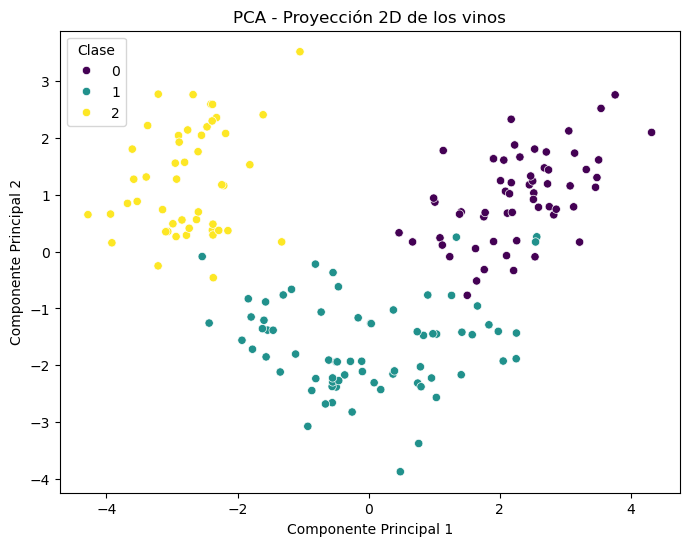

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="viridis")

plt.title("PCA - Proyección 2D de los vinos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clase")
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)